# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram has a tail to the right.  

Since it is right skewed, we expect the mean to be more to the left side, and we see that is true. The mean charge is 13,270.42 and the standard deviation is 12,105.48.

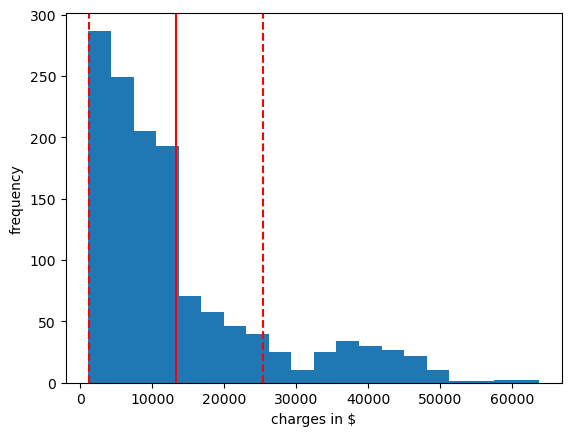

In [4]:
_ = plt.hist(medical['charges'], bins = 20)
_ = plt.xlabel('charges in $')
_ = plt.ylabel('frequency')
_ = plt.axvline(np.mean(medical.charges), color = 'r')
_ = plt.axvline(np.mean(medical.charges)+np.std(medical.charges), color='r', linestyle='--')
_ = plt.axvline(np.mean(medical.charges)-np.std(medical.charges), color='r', linestyle='--')

plt.show()

In [5]:
charges_mean = round(np.mean(medical.charges), 2)
charges_std = round(np.std(medical.charges), 2)
print('mean: ', charges_mean)
print('std: ', charges_std)

mean:  13270.42
std:  12105.48


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 


Since the data is randomly selected and the size of the sample is large (1338), we should be able to answer the question. 

We could do a one mean hypothesis test. This would involve a t-test.  

H0 = mu <= 12000

Ha = mu > 12,000

I generated a sample of the same size as medical and with the same standard deviation, but with a mean of 12,000. I then calculated the z-score and p-value of 13270.42. The p-value is 0.8950541407693045. So we fail to reject the null hypothesis. 

The true mean charge may be 12000 or less. 

In [6]:
# 12,000 is very close to the mean of medical. 

z_score1 = (np.mean(medical.charges) - 12000) / np.std(medical.charges)
print('z score of $12,000 in the distribution of charges in medical: ', z_score1)

z score of $12,000 in the distribution of charges in medical:  0.10494600321308634


In [7]:
#Generate sample for null hypothesis. 

sample = t.rvs(loc = 12000, scale = np.std(medical.charges), df = len(medical)-1, size = 1338)

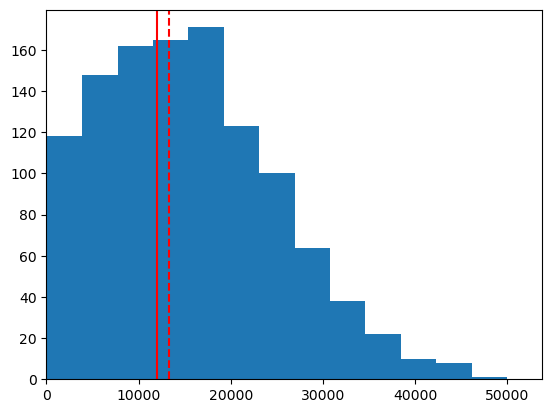

In [8]:
#Plot the histogram of the sample marking the threshold mean of 12000 and the observed mean of 13270.42. 

_ = plt.hist(sample, bins = 20)
_ = plt.xlim(0)
_ = plt.axvline(12000, color = 'r')
_ = plt.axvline(13270.42, color = 'r', linestyle = '--')
plt.show()

In [9]:
#Calculating the z-score and p-value of the observed mean under the null hypothesis. 

z_score2 = (13270.42 - 12000)/12105.48
p_value = 1 - t.cdf(z_score2, df = len(sample)-1)
print('z_score: ', z_score2)
print('p_value: ', p_value)

z_score:  0.10494585923069553
p_value:  0.45821725533733093


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 


One-side. Since we are mainly worried about the true mean being too low, this means we are interested in the left side of the interval. 

The 95% confidence interval is [12725.48, 13815.36] We can see that 12,000 is not included. Therefore the administrator does not need to be worried. 

In [10]:
#Confidence Interval

critical_value = t.ppf(0.95, df = 1337)
moe = critical_value * (np.std(medical.charges, ddof = 1)/np.sqrt(1338))
con_int = [round(charges_mean - moe, 2), round(charges_mean + moe, 2)]

print('critical value: ', critical_value)
print('margin of error: ', moe)
print('95% confidence interval: ', con_int)

critical value:  1.6459941145571317
margin of error:  544.9350813250251
95% confidence interval:  [12725.48, 13815.36]


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Let group 1 be the charges with insurance and group 2 be the charges without insurance. 

H0 : There is no difference between what people with insurance are charged and what people without insurance are charged.

H0 : mu1 = mu2

Ha : There is a difference between what people with insurance are charged and what people without insurance are charged.

Ha : mu1 =! mu2


We're assuming the variances of the two groups are similar. 

In [11]:
insured = medical[medical['insuranceclaim'] == 1]
uninsured = medical[medical['insuranceclaim'] == 0]

In [12]:
insured.shape

(783, 8)

In [13]:
insured.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [14]:
uninsured.shape

(555, 8)

In [15]:
uninsured.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [16]:
mean_ins = np.mean(insured.charges)
mean_unins = np.mean(uninsured.charges)

std_ins = np.std(insured.charges)
std_unins = np.std(uninsured.charges)

print('insured mean: ', mean_ins)
print('insured std: ', std_ins)
print('----------------------------')
print('uninsured mean: ', mean_unins)
print('uninsured std: ', std_unins)

insured mean:  16423.928276537663
insured std:  14036.956250260411
----------------------------
uninsured mean:  8821.421892306294
uninsured std:  6440.699841605233


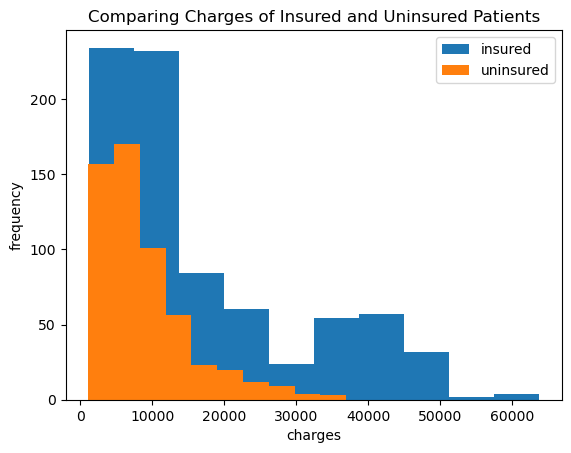

In [17]:
_ = plt.hist(insured.charges)
_ = plt.hist(uninsured.charges)
_ = plt.xlabel('charges')
_ = plt.ylabel('frequency')
_ = plt.title('Comparing Charges of Insured and Uninsured Patients')
_ = plt.legend(['insured', 'uninsured'])
plt.show()

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [18]:
#Calculating the pooled standard deviation.

n1 = len(insured)
s1 = std_ins
n2 = len(uninsured)
s2 = std_unins

pool_std = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2)/(n1 + n2 -2))
print(pool_std)

11512.282899205744


In [19]:
#Calculating the test statistic t. 

x1 = mean_ins
x2 = mean_unins

t_stat= (x1 - x2)/(pool_std * np.sqrt((1/n1) + (1/n2)))
print('t-statistic: ', t_stat)

t-statistic:  11.901306943555385


In [20]:
import scipy.stats as stats

In [21]:
pval = stats.t.sf(np.abs(t_stat), 1336)*2
print('p value: ', pval)

p value:  4.090550214373795e-31


In [22]:
# Variance test. I used the article at https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/ 
# It says "If the ratio of the larger data group to the smaller data group is less than 4:1, 
# then we can consider that the given data groups have equal variance. " 
# Ours is 4.7498...Doesn't this mean our two groups do not have equal variance?

ins_var = np.var(insured.charges)
unins_var = np.var(uninsured.charges)

print('insured variance: ', ins_var)
print('uninsured variance: ', unins_var)
print(ins_var/unins_var)

insured variance:  197036140.77172482
uninsured variance:  41482614.44965368
4.749848662765994


In [23]:
stats.ttest_ind(insured.charges, uninsured.charges, equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

# Interpret Results

Since the p-value is less than 5%, we reject the null hypothesis. 

That is we reject that people with insurance and people without insurance are charged the same. 

---------------------------------------------

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [24]:
stats?

__A:__ No, because we would need to know the population variance to be using a z-test and the normal distribution. That means we know everything about our population and thus do not need to do a hypothesis at all. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test